# Frequency of Beast 2 Files Having Problems 

author: Walter Xie

date: 26 May 2016

The package [ComMA](https://github.com/walterxie/ComMA) is used for visulization here.

In [1]:
suppressMessages(library("ComMA"))

# getwd()
# setwd("~/WorkSpace/beast2report/")

## 1. The frequency of classes being changed

Load [class.freq.text](data/class.freq.text) generated by the script introduced in README.

In [2]:
freq <- ComMA::readFile("data/class.freq.text", row.names=NULL)
freq <- freq[order(freq$count, decreasing=T),]


Upload file : 2 columns, 1648 rows excluding column names from row 1, from file data/class.freq.text 


### top 20 most frequently changed files

In [3]:
freq[1:20,]
max(freq$count)
min(freq$count)

,count,file
1648,191,src/beast/app/beauti/BeautiDoc.java
1647,140,src/beast/core/MCMC.java
1646,136,src/beast/app/beauti/Beauti.java
1645,124,src/beast/evolution/tree/Tree.java
1644,105,build.xml
1643,102,src/beast/app/beauti/AlignmentListInputEditor.java
1642,97,src/beast/util/TreeParser.java
1641,95,src/beast/util/XMLParser.java
1640,90,src/beast/evolution/tree/Node.java
1639,89,src/beast/core/Logger.java


[1] 191

[1] 1

Loading required package: scales
Warning message:
: Stacking not well defined when ymin != 0

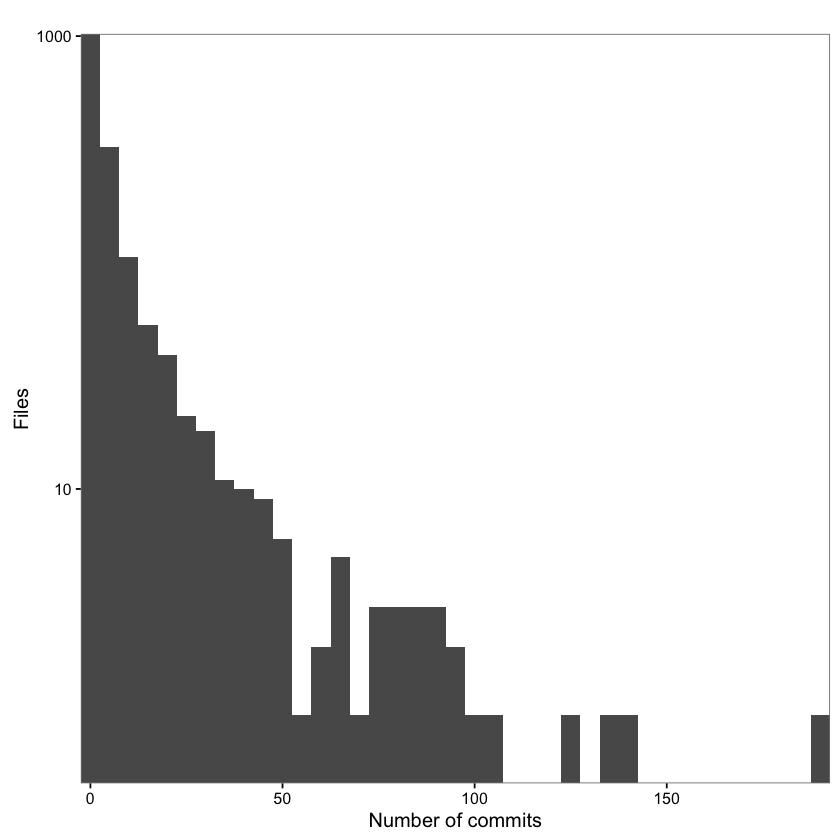

In [4]:
ggHistogram(freq, x.id="count", binwidth = 5, 
            x.lab="Number of commits", y.lab="Files", 
            y.trans="log", title="", verbose=F)

### remove files whose change < min.c

In [5]:
min.c = 50
freq <- freq[freq$count>=min.c,]
nrow(freq)

[1] 33

### BEAUTi

In [6]:
freq[grepl("beauti", freq$file) | grepl("draw", freq$file),]

,count,file
1648,191,src/beast/app/beauti/BeautiDoc.java
1646,136,src/beast/app/beauti/Beauti.java
1643,102,src/beast/app/beauti/AlignmentListInputEditor.java
1636,84,src/beast/app/beauti/BeautiPanel.java
1628,69,src/beast/app/draw/ListInputEditor.java
1625,67,src/beast/app/beauti/PriorListInputEditor.java
1623,64,src/beast/app/draw/InputEditor.java
1621,58,src/beast/app/beauti/TipDatesInputEditor.java
1619,51,src/beast/app/beauti/BeautiPanelConfig.java
1616,50,src/beast/app/beauti/BeautiSubTemplate.java


### Java but Not BEAUTi

In [7]:
freq[grepl(".java", freq$file) & 
     !(grepl("beauti", freq$file) | grepl("draw", freq$file)),]

,count,file
1647,140,src/beast/core/MCMC.java
1645,124,src/beast/evolution/tree/Tree.java
1642,97,src/beast/util/TreeParser.java
1641,95,src/beast/util/XMLParser.java
1640,90,src/beast/evolution/tree/Node.java
1639,89,src/beast/core/Logger.java
1638,88,src/beast/evolution/likelihood/TreeLikelihood.java
1637,86,src/beast/core/State.java
1635,83,src/beast/core/Input.java
1633,79,src/beast/evolution/alignment/Alignment.java


### rest

In [8]:
freq[!grepl(".java", freq$file),]

,count,file
1644,105,build.xml
1634,81,templates/Standard.xml
1630,76,templates/SubstModels.xml
1629,75,templates/StarBeast.xml


## 2. The frequency of classes associated to unique issues

Load [issue_dist.text](data/issue_dist.text) generated by the script introduced in README.

In [9]:
issue <- ComMA::readFile("data/issue_dist.text", sep=" ", row.names=NULL)
issue <- issue[order(issue$count, decreasing=T),]


Upload file : 2 columns, 637 rows excluding column names from row 1, from file data/issue_dist.text 


In [10]:
issue[1:20,]
max(issue$count)
min(issue$count)

,file,count
1,build.xml,27
193,src/beast/app/beauti/Beauti.java,25
192,src/beast/app/beauti/BeautiDoc.java,24
455,src/beast/util/AddOnManager.java,24
293,src/beast/core/MCMC.java,19
475,src/beast/util/TreeParser.java,19
189,src/beast/app/beauti/BeautiAlignmentProvider.java,17
181,src/beast/app/beastapp/BeastMain.java,16
187,src/beast/app/beauti/AlignmentListInputEditor.java,16
468,src/beast/util/NexusParser.java,16


[1] 27

[1] 1

Warning message:
: Stacking not well defined when ymin != 0

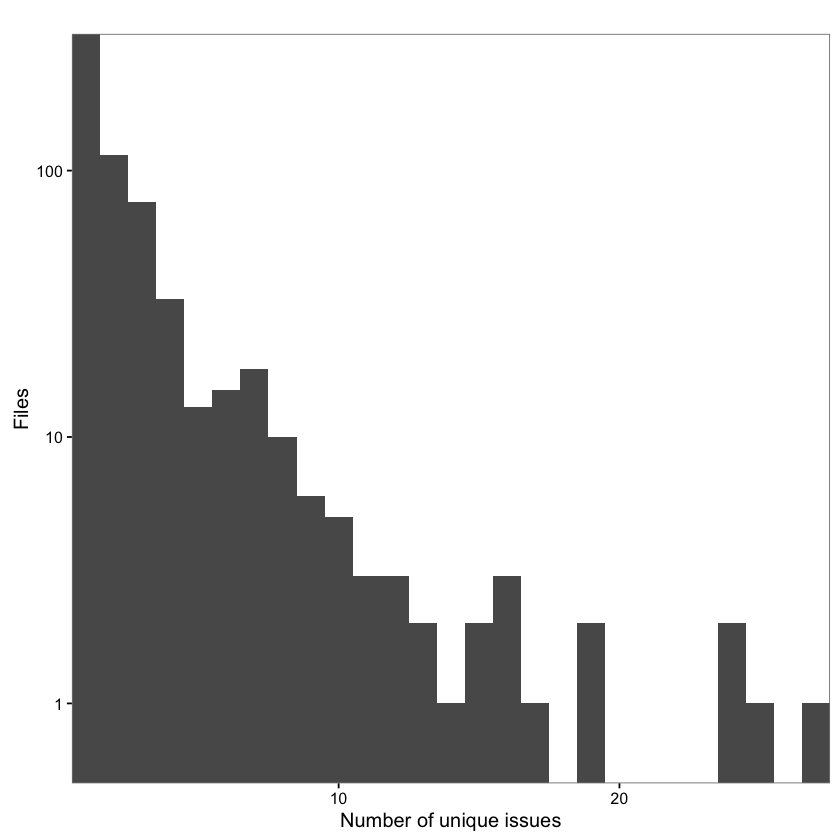

In [11]:
ggHistogram(issue, x.id="count", binwidth = 1, 
            x.lab="Number of unique issues", y.lab="Files", 
            y.trans="log", title="", verbose=F)

### remove files whose change < min.c

In [12]:
min.c = 7
issue <- issue[issue$count>=min.c,]
nrow(issue)

[1] 60

### BEAUTi

In [13]:
issue[grepl("beauti", issue$file) | grepl("draw", issue$file),]

,file,count
193,src/beast/app/beauti/Beauti.java,25
192,src/beast/app/beauti/BeautiDoc.java,24
189,src/beast/app/beauti/BeautiAlignmentProvider.java,17
187,src/beast/app/beauti/AlignmentListInputEditor.java,16
206,src/beast/app/beauti/JPackageDialog.java,11
196,src/beast/app/beauti/BeautiPanel.java,10
215,src/beast/app/beauti/SiteModelInputEditor.java,10
219,src/beast/app/beauti/TaxonSetInputEditor.java,10
214,src/beast/app/beauti/PriorListInputEditor.java,9
239,src/beast/app/draw/ListInputEditor.java,9


### Java but Not BEAUTi

In [14]:
issue[grepl(".java", issue$file) & 
     !(grepl("beauti", issue$file) | grepl("draw", issue$file)),]

,file,count
455,src/beast/util/AddOnManager.java,24
293,src/beast/core/MCMC.java,19
475,src/beast/util/TreeParser.java,19
181,src/beast/app/beastapp/BeastMain.java,16
468,src/beast/util/NexusParser.java,16
271,src/beast/app/treeannotator/TreeAnnotator.java,15
316,src/beast/evolution/alignment/Alignment.java,15
292,src/beast/core/Logger.java,14
180,src/beast/app/beastapp/BeastLauncher.java,13
257,src/beast/app/tools/LogCombiner.java,13


### rest

In [15]:
issue[!grepl(".java", issue$file),]

,file,count
1,build.xml,27
634,templates/StarBeast.xml,9
635,templates/SubstModels.xml,9
152,HISTORY.txt,7
162,release/common/VERSION,7
165,release/Linux/bin/beast,7
633,templates/Standard.xml,7


## 3. Merge

In [16]:
class.merge <- merge(freq, issue, by="file")
class.merge <- class.merge[order(class.merge$count.y, class.merge$count.x, 
                                 decreasing=T),]
class.merge[grepl(".java", class.merge$file),][1:20,]

,file,count.x,count.y
3,src/beast/app/beauti/Beauti.java,136,25
4,src/beast/app/beauti/BeautiDoc.java,191,24
22,src/beast/util/AddOnManager.java,77,24
15,src/beast/core/MCMC.java,140,19
24,src/beast/util/TreeParser.java,97,19
2,src/beast/app/beauti/AlignmentListInputEditor.java,102,16
23,src/beast/util/NexusParser.java,78,16
17,src/beast/evolution/alignment/Alignment.java,79,15
14,src/beast/core/Logger.java,89,14
25,src/beast/util/XMLParser.java,95,12


In [17]:
class.merge[!grepl(".java", class.merge$file),]

,file,count.x,count.y
1,build.xml,105,27
29,templates/SubstModels.xml,76,9
28,templates/StarBeast.xml,75,9
27,templates/Standard.xml,81,7


## 4. Code coverage of Beast 2 Unit tests

The [code coverage](https://www.jetbrains.com/help/idea/2016.1/code-coverage.html) is generated by Interllij, check the [report](./code_coverage) out to local to view with better style.

The package _beast.app_ is recoganised as an application in Mac OS _Finder_, but the contents can be displayed using _Show Package Contents_.

In [18]:
cc.packages <- list.dirs(path = "code_coverage", full.names = TRUE, recursive = TRUE)
cc.packages <- cc.packages[!grepl(".css|.img|.classes|^code_coverage$", cc.packages)]
#cc.packages
length(cc.packages)

[1] 27

### Percentage of lines covered by tests

The column _line.cov.per_ is the percentage of lines covered by tests.

In [19]:
code.coverage <- data.frame()
for (pa in cc.packages) {
    cc.list <- readCodeCoverage(file.path(pa, "index.html"))
    cc.df <- cc.list[["Class"]][,-2]
    if (nrow(cc.df) < 1)
        warning("No result from package", pa)
    colnames(cc.df) <- c("class", "method.cov.per", "line.cov.per")
    cc.df$line.cov.per <- as.numeric(cc.df$line.cov.per)
        cc.df$method.cov.per <- as.numeric(cc.df$method.cov.per)
    cc.df$package <- cc.list[["Package"]][1,1]
    code.coverage <- rbind(code.coverage, cc.df)
}
code.coverage[1:10,]

,class,method.cov.per,line.cov.per,package
1,BEASTVersion,22.2,8,beast.app
2,BEASTVersion2,25,25,beast.app
3,BeastMCMC,3.7,0.7,beast.app
4,DocMaker,7.1,0.4,beast.app
5,ModelBuilder,0,0,beast.app
6,BeastDialog,0,0,beast.app.beastapp
7,BeastLauncher,0,0,beast.app.beastapp
8,BeastMain,6.7,0.3,beast.app.beastapp
9,WholeNumberField,4.2,2,beast.app.beastapp
10,AlignmentListInputEditor,73,69.5,beast.app.beauti


### Check duplicate classes among packages

If any of duplicate classes is printed below, they should be considered to be renamed or merged.

In [20]:
dup.class <- findDuplicates(code.coverage$class)
if (length(dup.class) > 0) {
    dup.class.cc <- code.coverage[code.coverage$class %in% dup.class,]
    dup.class.cc[order(dup.class.cc$class),]
}

,class,method.cov.per,line.cov.per,package
5,ModelBuilder,0,0,beast.app
63,ModelBuilder,0,0,beast.app.draw
9,WholeNumberField,4.2,2,beast.app.beastapp
103,WholeNumberField,4.2,2,beast.app.util
88,FileDrop,5.7,1.4,beast.app.treeannotator
98,FileDrop,31.4,17.4,beast.app.util
120,Prior,0,0,beast.core
316,Prior,0,0,beast.math.distributions
147,Taxon,66.7,48,beast.evolution.alignment
264,Taxon,0,0,beast.evolution.taxonomy


### Weight the problemetic classes

Use _count_ / _line.cov.per_ or _count_ / _method.cov.per_, where _count_ is the number of issues resolved that involved changes to the file, and _?.cov.per_ is the fraction of percentage of methods or lines covered by tests.

In [21]:
code.coverage$class <- paste(code.coverage$package, code.coverage$class, sep=".")
#code.coverage[1:10,]
issue$class <- gsub("/", ".", issue$file)
issue$class <- gsub("src\\.(.*)\\.java", "\\1", issue$class)
#issue[1:10,]

In [22]:
isu.cc.merge <- merge(issue, code.coverage, by="class")
isu.cc.merge <- isu.cc.merge[order(isu.cc.merge$method.cov.per, 
                                   isu.cc.merge$line.cov.per),]
isu.cc.merge[1:20,c("class","count","method.cov.per","line.cov.per")]

,class,count,method.cov.per,line.cov.per
1,beast.app.beastapp.BeastLauncher,13,0,0
8,beast.app.beauti.BeautiLauncher,7,0,0
13,beast.app.beauti.JPackageDialog,11,0,0
21,beast.app.draw.BEASTObjectDialog,7,0,0
25,beast.app.tools.AppStore,9,0,0
30,beast.core.Logger,14,0,0
31,beast.core.MCMC,19,0,0
34,beast.core.util.CompoundDistribution,8,0,0
48,beast.util.LogAnalyser,10,3.8,0.6
12,beast.app.beauti.GuessPatternDialog,7,4.1,0.4


In [23]:
# round anything smaller than 1% to 1%
zero <- 1
isu.cc.merge[isu.cc.merge$method.cov.per < 1, "method.cov.per"] <- zero
isu.cc.merge[isu.cc.merge$line.cov.per < 1, "line.cov.per"] <- zero
# log code coverage
isu.cc.merge$weight.method <- isu.cc.merge$count / isu.cc.merge$method.cov.per
isu.cc.merge$weight.line <- isu.cc.merge$count / isu.cc.merge$line.cov.per
isu.cc.merge <- isu.cc.merge[order(isu.cc.merge$weight.method, 
                                   isu.cc.merge$weight.line, decreasing = T),]
isu.cc.merge[1:20,c("class","count","method.cov.per","weight.method",
                    "line.cov.per","weight.line")]

,class,count,method.cov.per,weight.method,line.cov.per,weight.line
31,beast.core.MCMC,19,1,19,1,19
30,beast.core.Logger,14,1,14,1,14
1,beast.app.beastapp.BeastLauncher,13,1,13,1,13
13,beast.app.beauti.JPackageDialog,11,1,11,1,11
25,beast.app.tools.AppStore,9,1,9,1,9
34,beast.core.util.CompoundDistribution,8,1,8,1,8
8,beast.app.beauti.BeautiLauncher,7,1,7,1,7
21,beast.app.draw.BEASTObjectDialog,7,1,7,1,7
48,beast.util.LogAnalyser,10,3.8,2.631579,1,10
2,beast.app.beastapp.BeastMain,16,6.7,2.38806,1,16


In [24]:
writeTable(isu.cc.merge, file="data/issue.code.coverage.txt", row.names = F)


Write file : 8 columns, 52 rows, to file data/issue.code.coverage.txt 


In [25]:
isu.cc.merge <- isu.cc.merge[,c("class","count","method.cov.per","weight.method",
                    "line.cov.per","weight.line")]
# normalize for heatmap
isu.cc.normed <- as.data.frame(lapply(isu.cc.merge[,-1], normalize))
isu.cc.normed$class <- isu.cc.merge$class
isu.cc.normed[1:10,]

,count,method.cov.per,weight.method,line.cov.per,weight.line,class
1,0.6666667,0,1,0,1,beast.core.MCMC
2,0.3888889,0,0.7357294,0,0.7357457,beast.core.Logger
3,0.3333333,0,0.6828753,0,0.6828949,beast.app.beastapp.BeastLauncher
4,0.2222222,0,0.577167,0,0.5771932,beast.app.beauti.JPackageDialog
5,0.1111111,0,0.4714588,0,0.4714915,beast.app.tools.AppStore
6,0.05555556,0,0.4186047,0,0.4186406,beast.core.util.CompoundDistribution
7,0,0,0.3657505,0,0.3657898,beast.app.beauti.BeautiLauncher
8,0,0,0.3657505,0,0.3657898,beast.app.draw.BEASTObjectDialog
9,0.1666667,0.02828283,0.1348615,0,0.5243423,beast.util.LogAnalyser
10,0.5,0.05757576,0.1219905,0,0.8414474,beast.app.beastapp.BeastMain


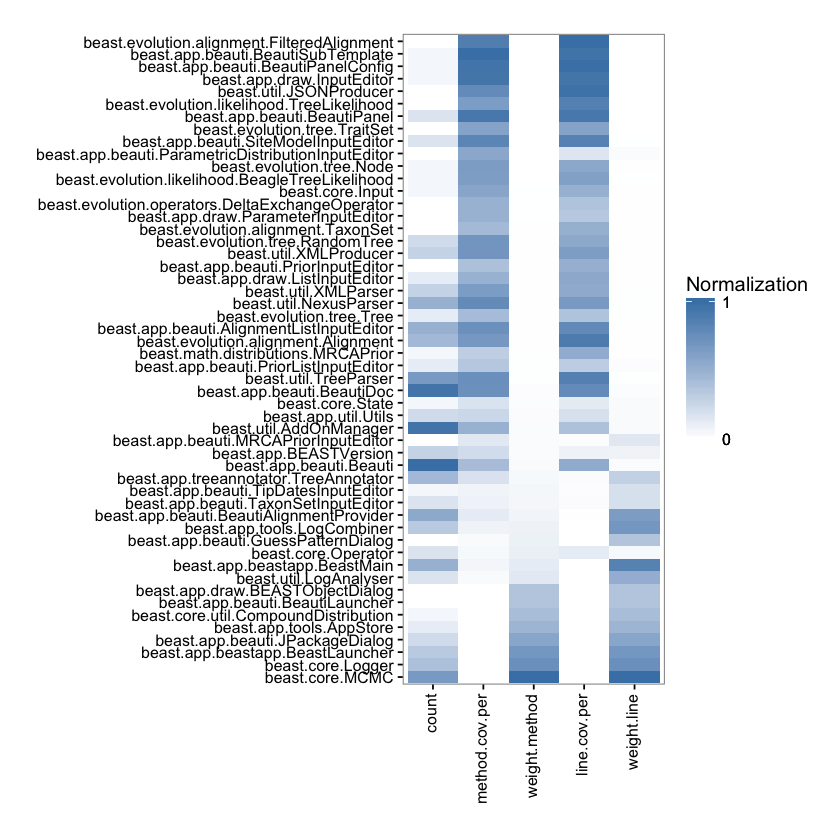

In [26]:
ggHeatmap(isu.cc.normed, melt.id="class", legend.title="Normalization", 
          title="", verbose=F)

### Less weight on code coverage

In [27]:
# less weight on code coverage
isu.cc.merge$weight.method <- (isu.cc.merge$count)^2 / isu.cc.merge$method.cov.per
isu.cc.merge$weight.line <- (isu.cc.merge$count)^2 / isu.cc.merge$line.cov.per
isu.cc.merge <- isu.cc.merge[order(isu.cc.merge$weight.method, 
                                   isu.cc.merge$weight.line, decreasing = T),]
isu.cc.merge[1:20,c("class","count","method.cov.per","weight.method",
                    "line.cov.per","weight.line")]

,class,count,method.cov.per,weight.method,line.cov.per,weight.line
31,beast.core.MCMC,19,1,361,1,361
30,beast.core.Logger,14,1,196,1,196
1,beast.app.beastapp.BeastLauncher,13,1,169,1,169
13,beast.app.beauti.JPackageDialog,11,1,121,1,121
25,beast.app.tools.AppStore,9,1,81,1,81
34,beast.core.util.CompoundDistribution,8,1,64,1,64
8,beast.app.beauti.BeautiLauncher,7,1,49,1,49
21,beast.app.draw.BEASTObjectDialog,7,1,49,1,49
2,beast.app.beastapp.BeastMain,16,6.7,38.20896,1,256
48,beast.util.LogAnalyser,10,3.8,26.31579,1,100


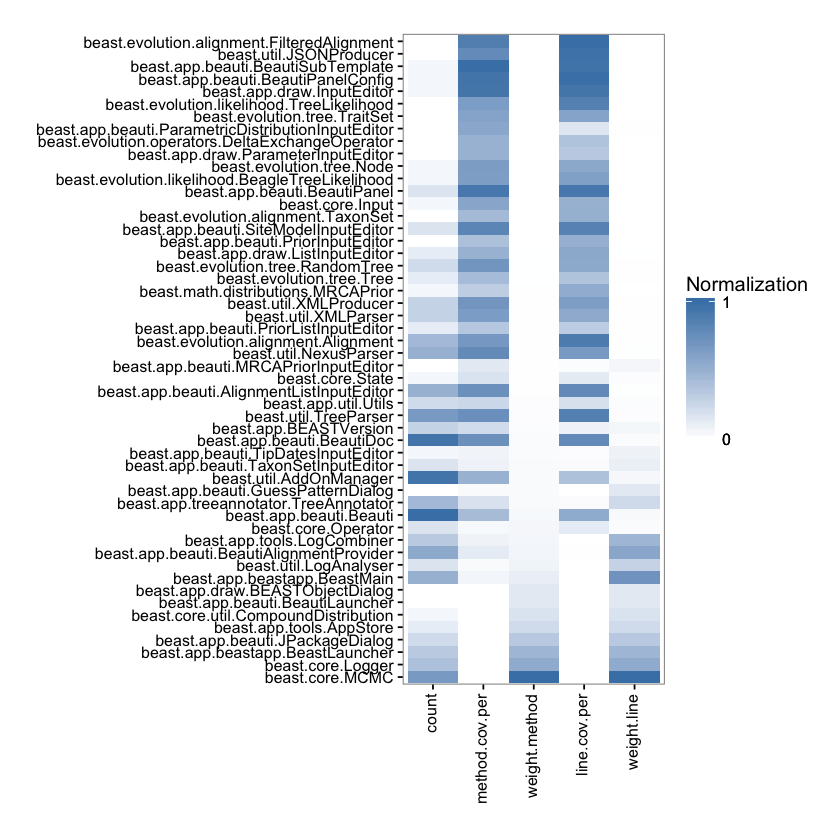

In [28]:
# normalize for heatmap
isu.cc.normed <- as.data.frame(lapply(isu.cc.merge[,-1], normalize))
isu.cc.normed$class <- isu.cc.merge$class
ggHeatmap(isu.cc.normed, melt.id="class", legend.title="Normalization", 
          title="", verbose=F)